# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here

# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer # Untuk menangani missing values

# Untuk Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer # Untuk Elbow Method

# Untuk PCA (Kriteria 3 Advanced)
from sklearn.decomposition import PCA

# Untuk evaluasi Clustering (Kriteria 4)
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Untuk menyimpan model .h5
import joblib

# Untuk menghilangkan warning (opsional, untuk tampilan notebook yang lebih bersih)
import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi (opsional, untuk estetika)
sns.set_style("whitegrid")

scalers = {}
label_encoders = {}

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Muat dataset
df = pd.read_csv('https://raw.githubusercontent.com/printlnfathur/Project2/refs/heads/main/bank_transactions_data_edited.csv')

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all')) # 'include=all' untuk menyertakan kolom non-numerik juga
print("\n" + "="*50 + "\n") # Pemisah output

Statistik Deskriptif Dataset:
       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2508      2516        2511.000000                 2509   
unique          2484       495                NaN                 2485   
top         TX001748   AC00362                NaN  2023-10-20 17:53:13   
freq               2        12                NaN                    2   
mean             NaN       NaN         297.656468                  NaN   
std              NaN       NaN         292.230367                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.310000                  NaN   
50%              NaN       NaN         211.360000                  NaN   
75%              NaN       NaN         413.105000                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count  

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

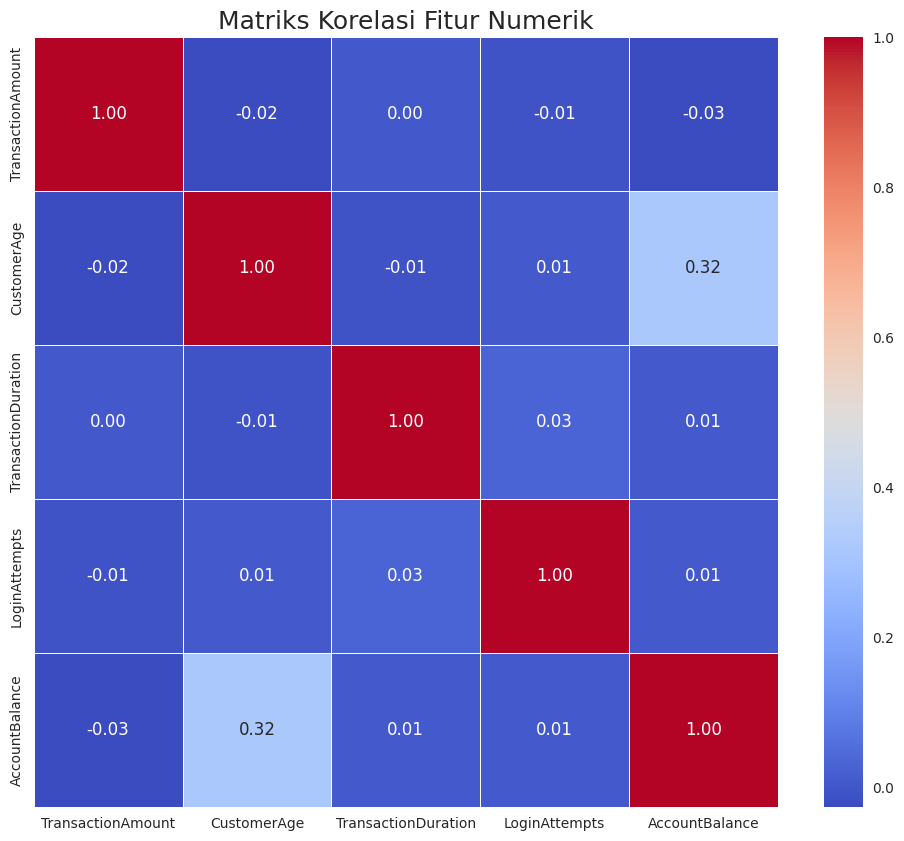

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()

# Kolom ID yang akan dikecualikan dari korelasi (karena ini bukan fitur prediktif)
# Ini adalah nama kolom ID dari dataset bank_transactions_data_edited.csv
id_cols_to_exclude = ['TransactionID', 'AccountID', 'DeviceID', 'IPAddress', 'MerchantID']

# Filter kolom numerik yang relevan untuk korelasi (yaitu, bukan kolom ID)
relevant_numerical_for_corr = [col for col in numerical_cols_for_corr if col not in id_cols_to_exclude]

if relevant_numerical_for_corr:
    plt.figure(figsize=(12, 10)) # Ukuran figure disesuaikan untuk visibilitas
    sns.heatmap(df[relevant_numerical_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Fitur Numerik', fontsize=18) # Ukuran font judul
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
else:
    print("Tidak ada kolom numerik yang relevan untuk matriks korelasi setelah mengecualikan kolom ID yang diasumsikan.")

print("\n" + "="*50 + "\n") # Pemisah output

Histogram untuk Fitur Numerik:


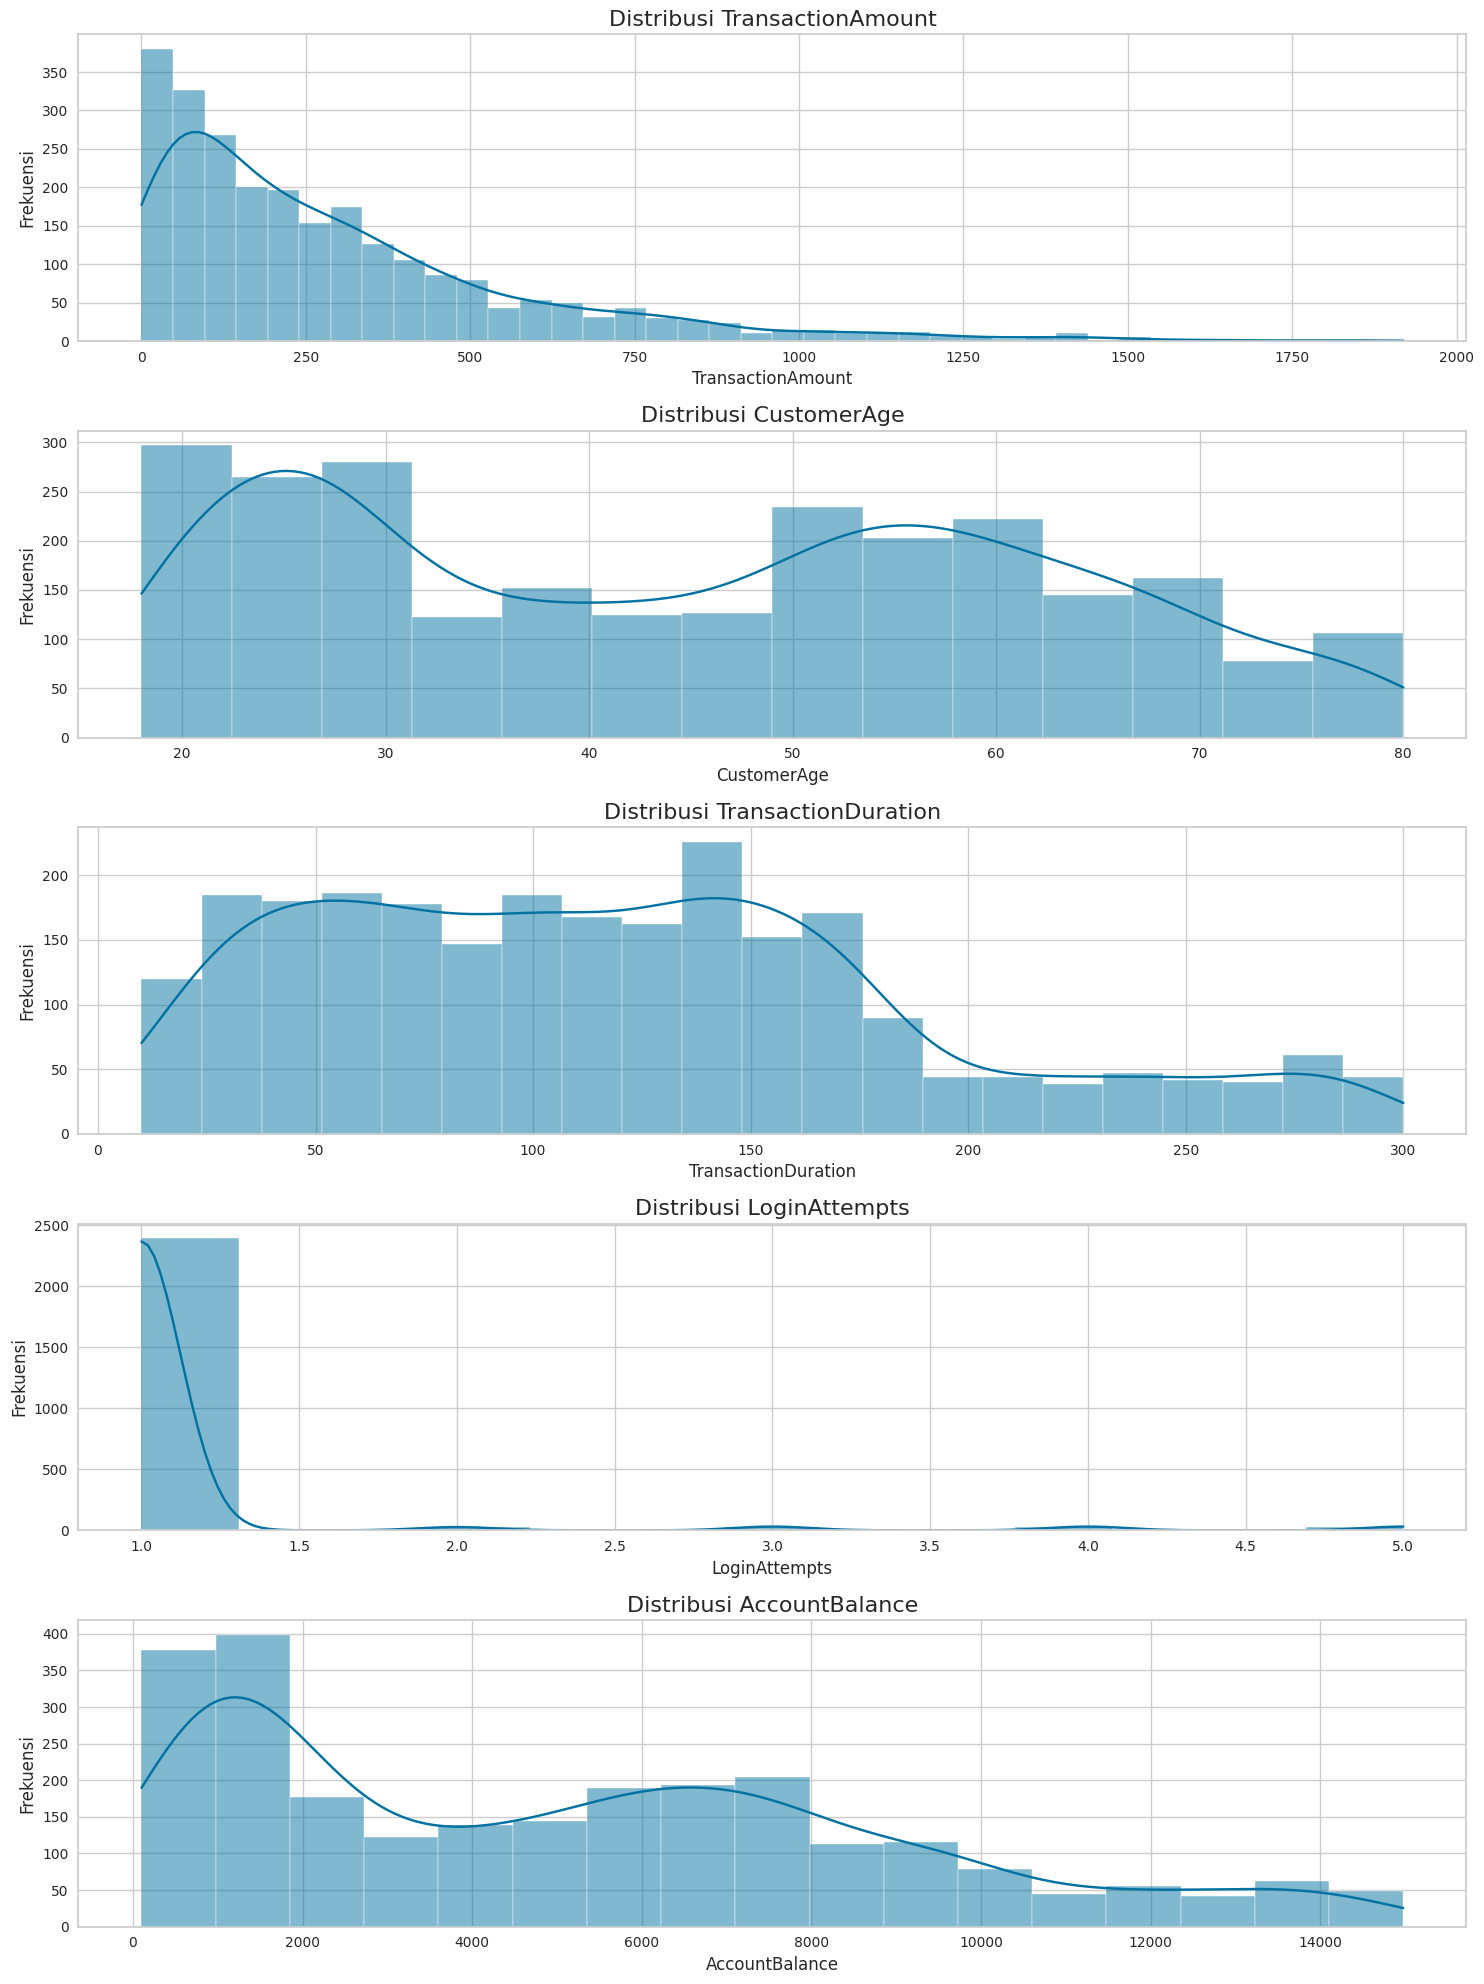

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Mengidentifikasi ulang kolom numerik dan kategorikal dari df saat ini (sebelum drop di preprocessing 4.x)
numerical_cols_eda = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols_eda = df.select_dtypes(include='object').columns.tolist()

# Kolom yang akan dikecualikan dari plot distribusi di EDA (sesuai feedback reviewer)
# IP Address sudah ada di sini. TransactionID, AccountID, DeviceID, MerchantID juga.
cols_to_exclude_from_eda_plots = [
    'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'
]

# Kolom tanggal yang akan diplot sebagai line chart
date_cols_for_line_plot = ['TransactionDate', 'PreviousTransactionDate']


# --- Filter kolom yang relevan untuk plot ---
relevant_numerical_eda = [col for col in numerical_cols_eda if col not in cols_to_exclude_from_eda_plots and col not in date_cols_for_line_plot]
relevant_categorical_eda = [col for col in categorical_cols_eda if col not in cols_to_exclude_from_eda_plots and col not in date_cols_for_line_plot]

# Gabungkan semua kolom yang akan diplot untuk menentukan ukuran figure total
all_cols_to_plot_count = len(relevant_numerical_eda) + len(relevant_categorical_eda) + len(date_cols_for_line_plot)


# --- Histogram untuk Fitur Numerik ---
if relevant_numerical_eda:
    print("Histogram untuk Fitur Numerik:")
    plt.figure(figsize=(15, len(relevant_numerical_eda) * 4)) # Tinggi figure disesuaikan

    for i, col in enumerate(relevant_numerical_eda):
        ax = plt.subplot(len(relevant_numerical_eda), 1, i + 1)
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Distribusi {col}', fontsize=16)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Frekuensi', fontsize=12)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik yang relevan untuk histogram.")

print("\n" + "="*50 + "\n")

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Visualisasi untuk Fitur Kategorikal:


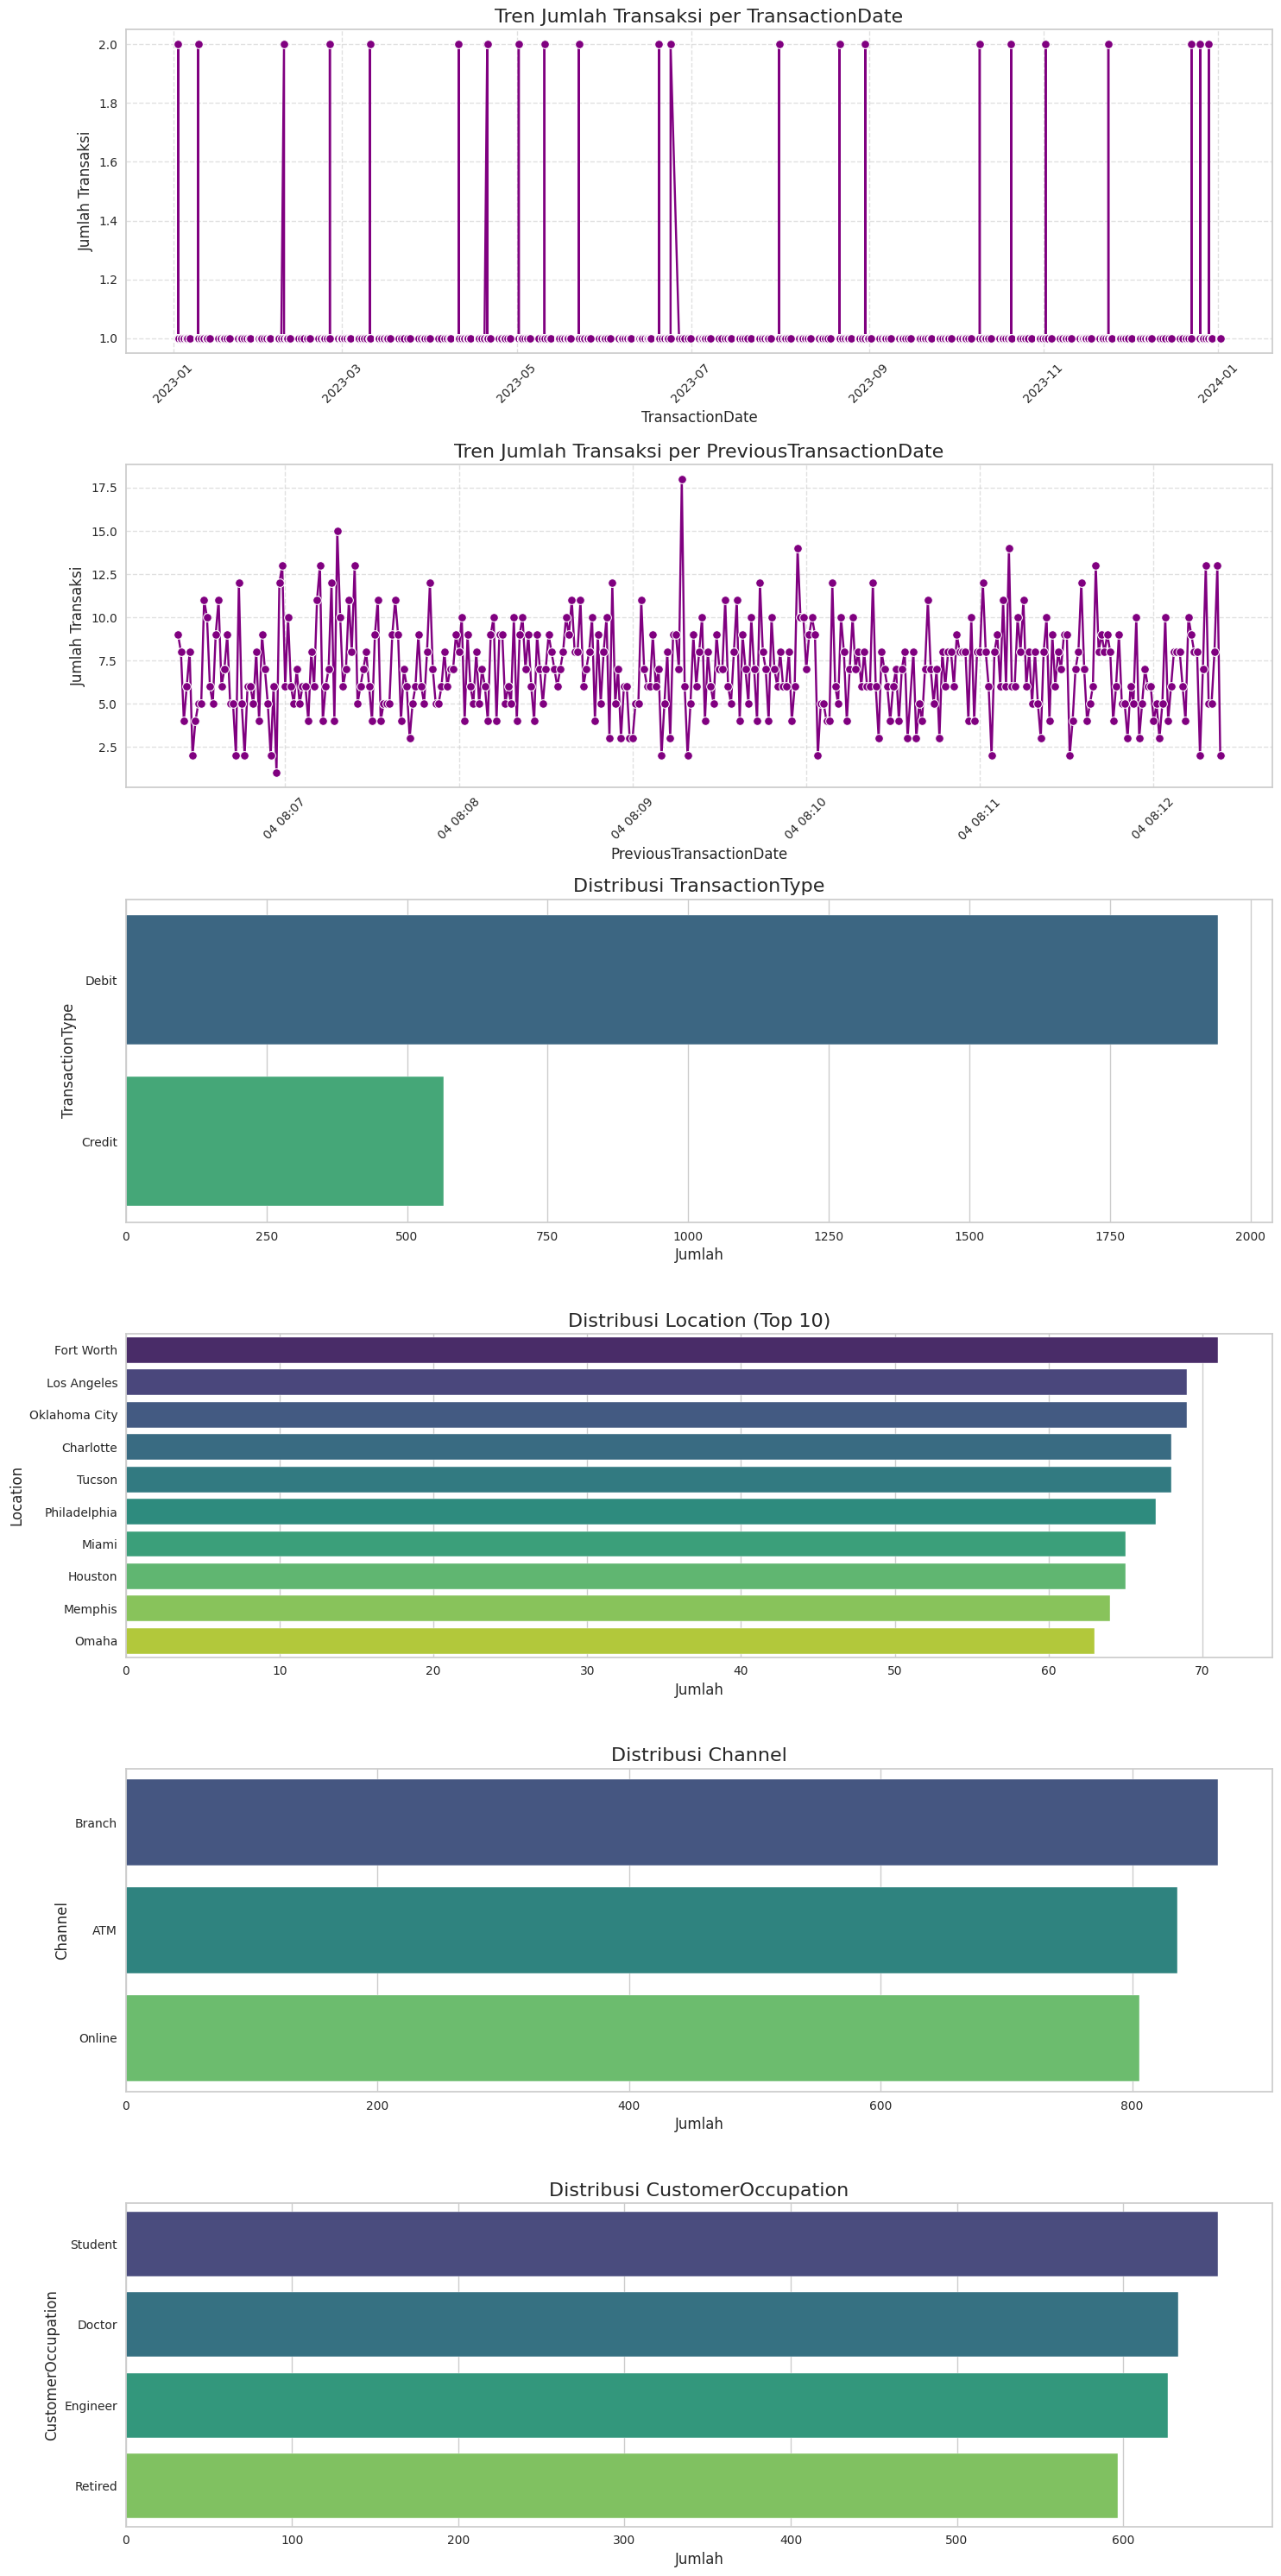

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# --- Plot untuk Fitur Kategorikal (Bar Plot & Line Chart untuk Tanggal) ---
print("Visualisasi untuk Fitur Kategorikal:")
# Kita akan membuat satu figure besar dengan subplot untuk semua plot kategorikal/tanggal
plt.figure(figsize=(15, (len(relevant_categorical_eda) + len(date_cols_for_line_plot)) * 5))
plot_idx = 0

# --- Line Chart untuk Kolom Tanggal ---
for col in date_cols_for_line_plot:
    if col in df.columns: # Pastikan kolom tanggal ada
        plot_idx += 1
        ax = plt.subplot(len(relevant_categorical_eda) + len(date_cols_for_line_plot), 1, plot_idx)

        # Konversi ke datetime (hanya untuk plotting di sini)
        temp_df_date = df.copy()
        temp_df_date[col] = pd.to_datetime(temp_df_date[col])

        # Kelompokkan berdasarkan tanggal dan hitung jumlah transaksi per tanggal
        daily_counts = temp_df_date.groupby(col).size().reset_index(name='Jumlah Transaksi')

        sns.lineplot(x=col, y='Jumlah Transaksi', data=daily_counts, marker='o', ax=ax, color='purple')
        ax.set_title(f'Tren Jumlah Transaksi per {col}', fontsize=16)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Jumlah Transaksi', fontsize=12)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataset untuk visualisasi tren.")

# --- Bar Plot untuk Kolom Kategorikal Lainnya ---
for col in relevant_categorical_eda:
    plot_idx += 1
    ax = plt.subplot(len(relevant_categorical_eda) + len(date_cols_for_line_plot), 1, plot_idx)

    if col == 'Location': # Implementasi top N untuk kolom Location
        top_n = 10 # Tampilkan top 10 kota
        top_locations = df[col].value_counts().head(top_n).index
        sns.countplot(y=col, data=df[df[col].isin(top_locations)], order=top_locations, palette='viridis', ax=ax)
        ax.set_title(f'Distribusi {col} (Top {top_n})', fontsize=16)
    else: # Untuk kolom kategorikal lainnya
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=ax)
        ax.set_title(f'Distribusi {col}', fontsize=16)

    ax.set_xlabel('Jumlah', fontsize=12)
    ax.set_ylabel(col, fontsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Jumlah Missing Values per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64




In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah Duplikat Data:")
print(df.duplicated().sum())
print("\n" + "="*50 + "\n")

Jumlah Duplikat Data:
21




In [11]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_patterns_to_drop = [
    'transactionid', 'accountid', 'deviceid', 'ipaddress', 'merchantid',
    'transactiondate', 'previoustransactiondate'
]

# Identifikasi kolom di df yang sesuai dengan pola ID yang harus dihapus
cols_to_drop_identified = []
for col_name in df.columns:
    # Konversi nama kolom df ke lowercase dan hapus spasi untuk matching yang fleksibel
    col_name_cleaned = col_name.lower().replace(' ', '')

    if col_name_cleaned in id_patterns_to_drop:
        cols_to_drop_identified.append(col_name) # Simpan nama kolom aslinya

if cols_to_drop_identified:
    print(f"Menghapus kolom ID dan kolom tanggal yang tidak relevan: {cols_to_drop_identified}")
    df.drop(columns=cols_to_drop_identified, inplace=True)
else:
    print("Tidak ada kolom ID atau kolom tanggal yang teridentifikasi untuk dihapus atau sudah dihapus sebelumnya.")

print("\nDataFrame setelah drop kolom ID dan kolom tanggal (head):")
print(df.head())
print("\nDataFrame setelah drop kolom ID dan kolom tanggal (info):")
df.info() # Periksa apakah kolom ID dan tanggal sudah hilang
print("\n" + "="*50 + "\n")

Menghapus kolom ID dan kolom tanggal yang tidak relevan: ['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']

DataFrame setelah drop kolom ID dan kolom tanggal (head):
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online          NaN   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student              

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# # Pastikan kamu menggunakan function head setelah melalukan scaling.
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# # Pastikan kamu menggunakan function head setelah melalukan encoding.

# Identifikasi kolom numerik dan kategorikal yang tersisa di df saat ini
numeric_cols_final_preprocessing = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols_final_preprocessing = df.select_dtypes(include='object').columns.tolist()

# Feature Scaling untuk fitur numerik (MinMaxScaler)
print("Melakukan Feature Scaling untuk fitur numerik (MinMaxScaler):")
scaler_minmax = MinMaxScaler()

# --- PENTING: Pembersihan Inf dan NaN sebelum Scaling jika belum sempurna ---
# Meskipun sudah ada penanganan outlier, ini adalah safeguard tambahan
for col in numeric_cols_final_preprocessing:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True) # Imputasi NaN lagi jika ada yang terlewat
        print(f"  Safeguard: NaN di kolom '{col}' diisi dengan median sebelum scaling.")
    if np.isinf(df[col]).any():
        print(f"  Safeguard: Inf di kolom '{col}' terdeteksi dan akan diatasi.")
        # Mengganti inf dengan batas max/min kolom, atau nilai tertentu
        max_val = df[col][~np.isinf(df[col])].max()
        min_val = df[col][~np.isinf(df[col])].min()
        df[col] = np.where(np.isinf(df[col]), max_val if df[col].iloc[0] > 0 else min_val, df[col]) # Contoh sederhana

# Simpan nama-nama kolom numerik yang akan diskalakan
scaled_numeric_feature_names = numeric_cols_final_preprocessing # Ini adalah nama kolom yang scaler akan fit
df[numeric_cols_final_preprocessing] = scaler_minmax.fit_transform(df[numeric_cols_final_preprocessing])
scalers['MinMaxScaler'] = scaler_minmax # Simpan scaler
scalers['ScaledFeatureNames'] = scaled_numeric_feature_names # --- PENTING: Simpan nama kolom yang diskalakan ---
print("  Fitur numerik setelah scaling:")
print(df[numeric_cols_final_preprocessing].head())
print("\n" + "="*50 + "\n")

# Feature Encoding untuk fitur kategorikal (LabelEncoder)
print("Melakukan Feature Encoding untuk fitur kategorikal (LabelEncoder):")
for col in categorical_cols_final_preprocessing:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  Kolom '{col}' di-encode.")
    print(f"  Mapping '{col}': {list(le.classes_)} -> {list(range(len(le.classes_)))}")

print("\nFitur kategorikal setelah encoding (head):")
print(df[categorical_cols_final_preprocessing].head())

print("\n" + "="*50 + "\n")

# Menghapus kolom asli yang bertipe objek/string setelah di-encode atau di-binning
cols_to_drop_after_final_encoding = df.select_dtypes(include='object').columns.tolist()

if cols_to_drop_after_final_encoding:
    print(f"Menghapus kolom objek/string yang sudah di-encode/di-binning: {cols_to_drop_after_final_encoding}")
    df.drop(columns=cols_to_drop_after_final_encoding, inplace=True)
else:
    print("Tidak ada kolom objek/string yang perlu dihapus setelah encoding.")

print("\nDataFrame setelah Preprocessing Lengkap (head):")
print(df.head())
print("\nDataFrame setelah Preprocessing Lengkap (info):")
df.info()
print("\n" + "="*50 + "\n")

Melakukan Feature Scaling untuk fitur numerik (MinMaxScaler):
  Safeguard: NaN di kolom 'TransactionAmount' diisi dengan median sebelum scaling.
  Safeguard: NaN di kolom 'CustomerAge' diisi dengan median sebelum scaling.
  Safeguard: NaN di kolom 'TransactionDuration' diisi dengan median sebelum scaling.
  Safeguard: NaN di kolom 'LoginAttempts' diisi dengan median sebelum scaling.
  Safeguard: NaN di kolom 'AccountBalance' diisi dengan median sebelum scaling.
  Fitur numerik setelah scaling:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.435484             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2 

In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
print("Daftar seluruh fitur yang ada setelah Preprocessing (siap untuk Clustering):")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

Daftar seluruh fitur yang ada setelah Preprocessing (siap untuk Clustering):
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']




(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
id_cols_to_exclude_from_imputation = ['TransactionID', 'AccountID', 'DeviceID', 'IPAddress', 'MerchantID']

print("Menangani missing values...")
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Identifikasi kolom ID yang akan dikecualikan dari imputasi jika mereka memiliki missing values
# Karena ID akan di-drop di langkah selanjutnya, tidak perlu diimputasi
id_cols_to_exclude_from_imputation = ['TransactionID', 'AccountID', 'DeviceID', 'IPAddress', 'MerchantID']

if cols_with_missing:
    for col in cols_with_missing:
        if col in id_cols_to_exclude_from_imputation:
            print(f"  Kolom '{col}' adalah ID, akan dihapus nanti, tidak diimputasi.")
            continue

        if df[col].dtype in ['int64', 'float64']: # Jika numerik
            imputer_numeric = SimpleImputer(strategy='median')
            df[col] = imputer_numeric.fit_transform(df[[col]]).ravel() # Fix: .ravel()
            print(f"  Kolom '{col}': missing values diisi dengan median.")
        else: # Jika kategorikal/object
            imputer_categorical = SimpleImputer(strategy='most_frequent')
            df[col] = imputer_categorical.fit_transform(df[[col]]).ravel() # Fix: .ravel()
            print(f"  Kolom '{col}': missing values diisi dengan mode.")
    print("\nMissing values setelah penanganan:")
    print(df.isnull().sum())
else:
    print("Tidak ada missing values yang ditemukan.")

print("\n" + "="*50 + "\n")

Menangani missing values...
Tidak ada missing values yang ditemukan.




In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
if df.duplicated().sum() > 0:
    print(f"Menghapus {df.duplicated().sum()} baris duplikat.")
    df.drop_duplicates(inplace=True)
    print("Duplikat data setelah penghapusan:")
    print(df.duplicated().sum())
else:
    print("Tidak ada duplikat data yang ditemukan.")

print("\n" + "="*50 + "\n")

Menghapus 24 baris duplikat.
Duplikat data setelah penghapusan:
0




(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [16]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
print("Handling Outlier menggunakan metode capping (IQR):")
numeric_cols_for_outlier = df.select_dtypes(include=np.number).columns.tolist()

if numeric_cols_for_outlier:
    for col in numeric_cols_for_outlier:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_lower = df[df[col] < lower_bound].shape[0]
        outliers_upper = df[df[col] > upper_bound].shape[0]
        total_outliers = outliers_lower + outliers_upper

        if total_outliers > 0:
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            print(f"  Kolom '{col}': {total_outliers} outlier ditangani dengan capping. (Lower: {outliers_lower}, Upper: {outliers_upper})")
        else:
            print(f"  Tidak ada outlier signifikan di kolom '{col}'.")
else:
    print("Tidak ada kolom numerik yang tersisa untuk penanganan outlier.")

print("\nDataFrame setelah penanganan outlier (beberapa baris):")
print(df.head())
print("\n" + "="*50 + "\n")

Handling Outlier menggunakan metode capping (IQR):
  Kolom 'TransactionAmount': 113 outlier ditangani dengan capping. (Lower: 0, Upper: 113)
  Kolom 'TransactionType': 592 outlier ditangani dengan capping. (Lower: 562, Upper: 30)
  Tidak ada outlier signifikan di kolom 'Location'.
  Tidak ada outlier signifikan di kolom 'Channel'.
  Tidak ada outlier signifikan di kolom 'CustomerAge'.
  Tidak ada outlier signifikan di kolom 'CustomerOccupation'.
  Tidak ada outlier signifikan di kolom 'TransactionDuration'.
  Kolom 'LoginAttempts': 120 outlier ditangani dengan capping. (Lower: 0, Upper: 120)
  Tidak ada outlier signifikan di kolom 'AccountBalance'.

DataFrame setelah penanganan outlier (beberapa baris):
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207              1.0        36        0     0.838710   
1           0.195940              1.0        15        0     0.806452   
2           0.065680              1.0        23        2     0.01612

In [17]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
print("Melakukan Binning dan Encoding hasil Binning:")

# Binning pada 'TransactionAmount'
if 'TransactionAmount' in df.columns:
    bins_amount = [0, 50, 200, 1000, np.inf]
    labels_amount = ['Low_Amount', 'Medium_Amount', 'High_Amount', 'Very_High_Amount']
    df['TransactionAmount_Category'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount, right=False)

    le_transaction_amount_cat = LabelEncoder()
    df['TransactionAmount_Category_Encoded'] = le_transaction_amount_cat.fit_transform(df['TransactionAmount_Category'])
    print("  Fitur 'TransactionAmount' di-binning menjadi 'TransactionAmount_Category' dan di-encode.")
    print(f"  Mapping 'TransactionAmount_Category': {list(le_transaction_amount_cat.classes_)} -> {list(range(len(le_transaction_amount_cat.classes_)))}")
    print(df[['TransactionAmount', 'TransactionAmount_Category', 'TransactionAmount_Category_Encoded']].head())
else:
    print("Kolom 'TransactionAmount' tidak ditemukan untuk binning (mungkin sudah dihapus/dinamai ulang).")

print("\n" + "="*50 + "\n")

# Binning pada 'Age' (jika ada dan relevan)
if 'CustomerAge' in df.columns:
    bins_age = [0, 18, 35, 55, np.inf]
    labels_age = ['Young', 'Adult', 'Middle-aged', 'Senior'] # Urutan label yang diinginkan

    # --- PERBAIKAN: Melakukan encoding yang mempertahankan urutan ---
    # Buat Series Categorical dengan urutan yang eksplisit
    age_category_type = pd.CategoricalDtype(categories=labels_age, ordered=True)
    df['Age_Category'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age, right=False).astype(age_category_type)

    # Dapatkan kode numerik berdasarkan urutan yang sudah didefinisikan (Young=0, Adult=1, dst.)
    df['Age_Category_Encoded'] = df['Age_Category'].cat.codes

    # Simpan tipe data kategorikal ini untuk inverse_transform nanti
    label_encoders['Age_Category'] = age_category_type # Simpan pd.CategoricalDtype object

    print("  Fitur 'CustomerAge' di-binning menjadi 'Age_Category' dan di-encode dengan urutan.")
    print(f"  Mapping 'Age_Category' (Ordered): {list(age_category_type.categories)} -> {list(range(len(age_category_type.categories)))}")
    print(df[['CustomerAge', 'Age_Category', 'Age_Category_Encoded']].head())
else:
    print("Kolom 'CustomerAge' tidak ditemukan untuk binning.")

print("\n" + "="*50 + "\n")

Melakukan Binning dan Encoding hasil Binning:
  Fitur 'TransactionAmount' di-binning menjadi 'TransactionAmount_Category' dan di-encode.
  Mapping 'TransactionAmount_Category': ['Low_Amount'] -> [0]
   TransactionAmount TransactionAmount_Category  \
0           0.007207                 Low_Amount   
1           0.195940                 Low_Amount   
2           0.065680                 Low_Amount   
3           0.096016                 Low_Amount   
4           0.006874                 Low_Amount   

   TransactionAmount_Category_Encoded  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  


  Fitur 'CustomerAge' di-binning menjadi 'Age_Category' dan di-encode dengan urutan.
  Mapping 'Age_Category' (Ordered): ['Young', 'Adult', 'Middle-aged', 'Senior'] -> [0, 1, 2, 3]
   CustomerAge Age_Category  Age_Category_Encoded
0     0.838710       

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [18]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe(include='all')

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Category,TransactionAmount_Category_Encoded,Age_Category,Age_Category_Encoded
count,2513.000000,2513.0,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.0,2513.000000,2513,2513.0,2513,2513.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low_Amount,NaN,Young,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2513,NaN,2513,NaN
mean,0.147674,1.0,21.276562,1.010744,0.429528,1.529646,0.377539,0.0,0.336969,NaN,0.0,NaN,0.0
std,0.130094,0.0,12.394375,0.831005,0.286158,1.150333,0.240191,0.0,0.260682,NaN,0.0,NaN,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.0,NaN,0.0
25%,0.043203,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.095325,NaN,0.0,NaN,0.0
50%,0.110014,1.0,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.311416,NaN,0.0,NaN,0.0
75%,0.213331,1.0,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.506899,NaN,0.0,NaN,0.0


In [19]:
# Menghapus kolom kategorikal asli yang sudah di-encode
if 'TransactionAmount_Category' in df.columns:
    df.drop(columns=['TransactionAmount_Category'], inplace=True)
    print("Kolom 'TransactionAmount_Category' telah dihapus.")
else:
    print("Kolom 'TransactionAmount_Category' tidak ditemukan untuk dihapus.")

if 'Age_Category' in df.columns: # Jika Anda juga melakukan binning pada 'Age'
    df.drop(columns=['Age_Category'], inplace=True)
    print("Kolom 'Age_Category' telah dihapus.")
else:
    print("Kolom 'Age_Category' tidak ditemukan untuk dihapus.")

print("\nDataFrame setelah menghapus kolom kategori asli (head):")
print(df.head())
print("\n" + "="*50 + "\n")

Kolom 'TransactionAmount_Category' telah dihapus.
Kolom 'Age_Category' telah dihapus.

DataFrame setelah menghapus kolom kategori asli (head):
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207              1.0        36        0     0.838710   
1           0.195940              1.0        15        0     0.806452   
2           0.065680              1.0        23        2     0.016129   
3           0.096016              1.0        33        2     0.129032   
4           0.006874              1.0         1        2     0.435484   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0             0.244828            0.0        0.336832   
1                   0             0.451724            0.0        0.918055   
2                   3             0.158621            0.0        0.068637   
3                   3             0.051724            0.0        0.569198   
4                   3            

Visualisasi Elbow Method untuk Menentukan K Optimal:


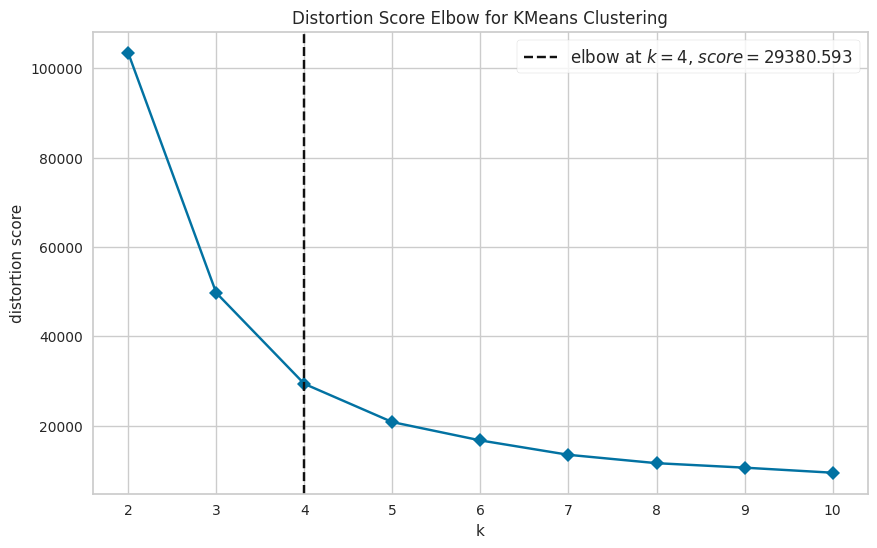

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model_kmeans_for_elbow = KMeans(random_state=42, n_init=10) # n_init='auto' atau 10

plt.figure(figsize=(10, 6))
# Visualizer untuk Elbow Method
# X adalah DataFrame 'df' yang sudah di-preprocessing
visualizer = KElbowVisualizer(
    model_kmeans_for_elbow, k=(2,11), # Mencoba k dari 2 sampai 10
    metric='distortion', timings=False, locate_elbow=True # metric 'distortion' adalah SSE
)

print("Visualisasi Elbow Method untuk Menentukan K Optimal:")
visualizer.fit(df) # Fit visualizer ke data yang sudah di-preprocessing
visualizer.show() # Menampilkan plot Elbow Method

print("\n" + "="*50 + "\n")

In [21]:
# Menggunakan algoritma K-Means Clustering

optimal_k = 4

# Inisialisasi model K-Means dengan k yang optimal
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Latih model K-Means pada DataFrame yang sudah di-preprocessing
print(f"Melatih model K-Means dengan {optimal_k} cluster...")
kmeans_model.fit(df)
print("Model K-Means selesai dilatih.")

# Tambahkan label cluster ke DataFrame df
df['cluster_label'] = kmeans_model.labels_
print("\nLabel cluster berhasil ditambahkan ke DataFrame 'df'.")
print("Tampilan df dengan kolom cluster_label (head):")
print(df.head())

print("\n" + "="*50 + "\n")

Melatih model K-Means dengan 4 cluster...
Model K-Means selesai dilatih.

Label cluster berhasil ditambahkan ke DataFrame 'df'.
Tampilan df dengan kolom cluster_label (head):
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207              1.0        36        0     0.838710   
1           0.195940              1.0        15        0     0.806452   
2           0.065680              1.0        23        2     0.016129   
3           0.096016              1.0        33        2     0.129032   
4           0.006874              1.0         1        2     0.435484   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0             0.244828            0.0        0.336832   
1                   0             0.451724            0.0        0.918055   
2                   3             0.158621            0.0        0.068637   
3                   3             0.051724            0.0        0.569198   
4

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans_model, 'model_clustering.h5')
print("Model K-Means Clustering berhasil disimpan sebagai 'model_clustering.h5'.")

print("\n" + "="*50 + "\n")

Model K-Means Clustering berhasil disimpan sebagai 'model_clustering.h5'.




(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df.drop(columns=['cluster_label']), df['cluster_label'])
print(f"Silhouette Score untuk K-Means dengan {optimal_k} cluster: {silhouette_avg:.4f}")

print("\n" + "="*50 + "\n")

Silhouette Score untuk K-Means dengan 4 cluster: 0.5114




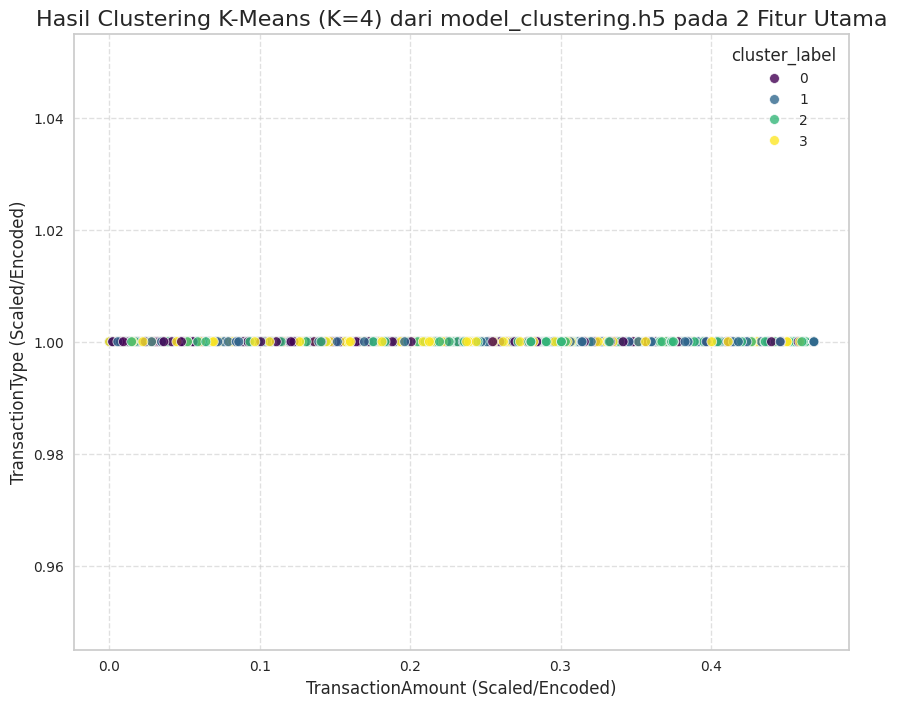

In [24]:
# Membuat visualisasi hasil clustering
if df.shape[1] - 1 >= 2: # Pastikan ada setidaknya 2 fitur (selain 'cluster_label') untuk plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=df.iloc[:, 0], # Menggunakan fitur pertama dari data yang sudah diproses (df)
        y=df.iloc[:, 1], # Menggunakan fitur kedua dari data yang sudah diproses (df)
        hue='cluster_label', # Mewarnai titik-titik berdasarkan label cluster
        data=df, # Data yang digunakan untuk plotting
        palette='viridis', # Skema warna untuk cluster
        legend='full', # Menampilkan legend untuk cluster ID
        s=50, # Ukuran titik
        alpha=0.8 # Transparansi titik
    )
    plt.title(f'Hasil Clustering K-Means (K={optimal_k}) dari model_clustering.h5 pada 2 Fitur Utama', fontsize=16)
    plt.xlabel(f'{df.columns[0]} (Scaled/Encoded)', fontsize=12) # Label sumbu X sesuai nama kolom
    plt.ylabel(f'{df.columns[1]} (Scaled/Encoded)', fontsize=12) # Label sumbu Y sesuai nama kolom
    plt.grid(True, linestyle='--', alpha=0.6) # Tambahkan grid
    plt.show()
else:
    print("Tidak cukup fitur (minimal 2 setelah drop cluster_label) untuk visualisasi scatter plot dasar.")
    print("Visualisasi lebih lanjut mungkin memerlukan reduksi dimensi seperti PCA (dilakukan di bagian Advanced selanjutnya).")

print("\n" + "="*50 + "\n")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Membangun model PCA dengan 2 komponen...
Transformasi PCA berhasil dilakukan.


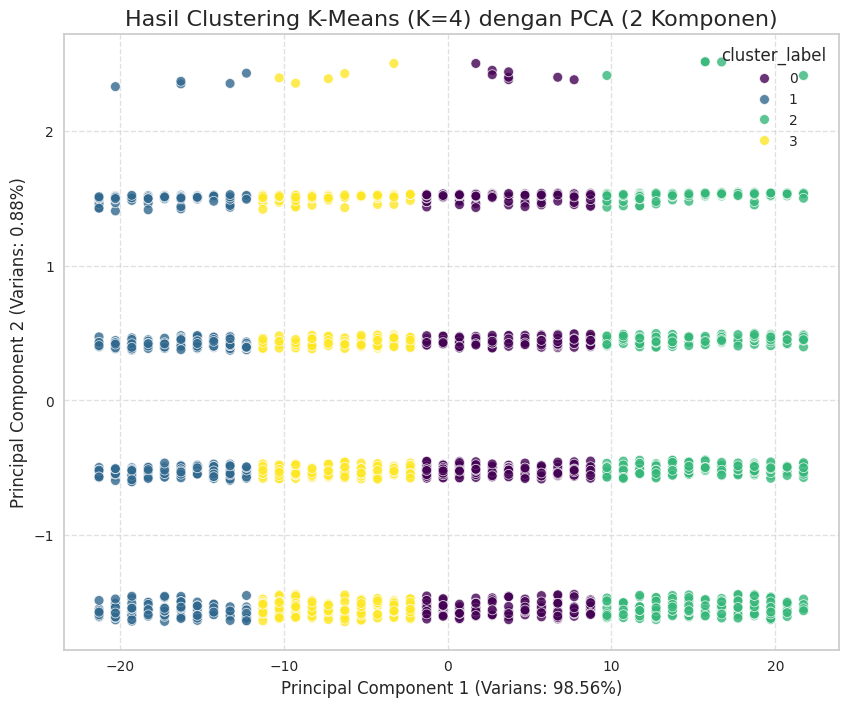

In [25]:
# Membangun model menggunakan PCA.

# Pisahkan fitur dari kolom 'cluster_label' untuk PCA
# Ingat, PCA hanya diterapkan pada fitur input, bukan label hasil clustering.
X_for_pca = df.drop(columns=['cluster_label'])

# Inisialisasi PCA. Pilih jumlah komponen, misalnya 2 untuk visualisasi 2D.
# Pastikan jumlah komponen tidak melebihi jumlah fitur yang ada.
num_features_for_pca = X_for_pca.shape[1]
n_components_pca = min(2, num_features_for_pca) # Umumnya 2 komponen untuk visualisasi 2D

if num_features_for_pca >= n_components_pca:
    print(f"Membangun model PCA dengan {n_components_pca} komponen...")
    pca_model = PCA(n_components=n_components_pca, random_state=42)

    # Fit dan transform data (tanpa kolom cluster_label)
    df_pca_transformed = pca_model.fit_transform(X_for_pca)

    print("Transformasi PCA berhasil dilakukan.")

    # Visualisasi hasil clustering dengan PCA (jika 2 komponen)
    if n_components_pca == 2:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x=df_pca_transformed[:, 0], # Principal Component 1
            y=df_pca_transformed[:, 1], # Principal Component 2
            hue=df['cluster_label'], # Mewarnai berdasarkan label cluster
            palette='viridis',
            legend='full',
            s=50,
            alpha=0.8
        )
        plt.title(f'Hasil Clustering K-Means (K={optimal_k}) dengan PCA ({n_components_pca} Komponen)', fontsize=16)
        plt.xlabel(f'Principal Component 1 (Varians: {pca_model.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
        plt.ylabel(f'Principal Component 2 (Varians: {pca_model.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print(f"PCA dilakukan, tetapi tidak ada visualisasi 2D karena jumlah komponen PCA adalah {n_components_pca}.")
else:
    print("Tidak cukup fitur untuk menerapkan PCA.")


print("\n" + "="*50 + "\n")

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# Pastikan pca_model sudah didefinisikan dari cell sebelumnya
joblib.dump(pca_model, 'PCA_model_clustering.h5')
print("Model PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'.")

print("\n" + "="*50 + "\n")

Model PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'.




# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

print("Analisis Deskriptif Tiap Cluster (data sudah di-preprocessing/skala/encode):")

# Ambil kolom numerik dan kategorikal dari df yang sudah diproses
# Ingat, di sini df sudah tidak memiliki kolom objek/string (mereka sudah di-encode menjadi numerik atau _Encoded).
# Jadi semua kolom selain 'cluster_label' seharusnya numerik.
numeric_cols_preprocessed = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_preprocessed_for_desc = [col for col in numeric_cols_preprocessed if col != 'cluster_label']

# Jika ada kolom yang dulunya kategorikal dan sekarang sudah berupa angka (misal hasil LabelEncoder, _Encoded)
# Kita bisa mengecek dtypes mereka untuk memastikan. Namun, mereka akan masuk ke 'numeric_cols_preprocessed'.
# Untuk melihat "modus" mereka, kita tetap harus memperlakukannya sebagai kategori.
# Kita akan gunakan label_encoders untuk mendapatkan nama kolom kategorikal aslinya dan melihat modusnya dari df.

# Agregasi untuk kolom numerik (termasuk yang dulunya kategorikal dan sudah di-encode ke numerik)
if numeric_cols_preprocessed_for_desc:
    print("\nRingkasan Statistik Numerik per Cluster (Data Skala/Encode):")
    print(df.groupby('cluster_label')[numeric_cols_preprocessed_for_desc].agg(['mean', 'min', 'max', 'median', 'std']))
else:
    print("\nTidak ada fitur numerik untuk dianalisis sebelum inverse transform.")

# Agregasi untuk kolom yang dulunya kategorikal (setelah LabelEncoder), tapi sekarang numerik
# Kita akan menggunakan label_encoders.keys() untuk mendapatkan nama kolom asli/kategorinya
if label_encoders:
    print("\nModus Fitur Kategorikal per Cluster (Data Setelah Encoding):")
    for original_col_name in label_encoders.keys():
        # Cek apakah kolom asli kategorikal masih ada di df (setelah diencode)
        # Atau apakah versi _Encoded-nya ada
        col_in_df = None
        if original_col_name in df.columns: # Misal 'PaymentMethod' langsung di-encode di df
            col_in_df = original_col_name
        elif f"{original_col_name}_Encoded" in df.columns: # Misal 'Age_Category_Encoded'
            col_in_df = f"{original_col_name}_Encoded"

        if col_in_df:
            print(f"\nKolom '{original_col_name}' (Encoded as '{col_in_df}'):")
            # Convert ke int karena modus dicari dari nilai diskrit
            modes = df.groupby('cluster_label')[col_in_df].apply(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')

            # Untuk interpretasi yang lebih baik, kita bisa mencoba inverse_transform mode ini jika memungkinkan
            # Tapi ini adalah contoh 'sebelum inverse', jadi kita tampilkan angka encoded-nya.
            print(modes)
else:
    print("\nTidak ada fitur kategorikal yang ditemukan untuk analisis modus sebelum inverse transform.")

print("\n" + "="*50 + "\n")

Analisis Deskriptif Tiap Cluster (data sudah di-preprocessing/skala/encode):

Ringkasan Statistik Numerik per Cluster (Data Skala/Encode):
              TransactionAmount                                          \
                           mean       min       max    median       std   
cluster_label                                                             
0                      0.143188  0.000000  0.468523  0.105449  0.126896   
1                      0.146157  0.000031  0.468523  0.110014  0.131644   
2                      0.150917  0.000599  0.468523  0.108456  0.133710   
3                      0.150377  0.000099  0.468523  0.115981  0.128048   

              TransactionType                        ...  \
                         mean  min  max median  std  ...   
cluster_label                                        ...   
0                         1.0  1.0  1.0    1.0  0.0  ...   
1                         1.0  1.0  1.0    1.0  0.0  ...   
2                         1.0  1.0 

1. **Klaster 0 (Data Skala/Encode)**:
  - Fitur Numerik (Skala 0-1):
    - TransactionAmount: Rata-rata 0.143, min 0.000, max 0.469.
    Nilai TransactionAmount di klaster ini, dalam skala terstandardisasi, menunjukkan rata-rata yang relatif rendah (sekitar 14.3% dari rentang nilai transaksi keseluruhan). Ini berarti sebagian besar transaksi di klaster ini berada di sisi bawah spektrum nilai transaksi.
    - CustomerAge rata-ratanya 0.5
    berarti usia pelanggan cenderung di tengah rentang usia keseluruhan setelah diskalakan.
    - AccountBalance rata-ratanya 0.7
    berarti saldo akun pelanggan cenderung tinggi dalam skala terstandardisasi.
    - Fitur Numerik/Kategorikal yang Konstanta (Tidak Membedakan):
    - TransactionType (Encoded), TransactionAmount_Category_Encoded, Age_Category_Encoded semuanya menunjukkan nilai yang seragam (misalnya 1.0 atau 0.0) dengan standar deviasi 0.0. Ini berarti fitur-fitur ini tidak bervariasi antar klaster dalam bentuk encoded, sehingga tidak menjadi faktor pembeda dalam model clustering ini.
  - Fitur Kategorikal (Encoded):
    - Location: Modus 20.
    - Channel: Modus 1.
    - CustomerOccupation: Modus 3.
  - **Analisis:** Klaster ini utamanya ditandai oleh kombinasi unik dari Lokasi (encoded: 20), Saluran (encoded: 1), dan Pekerjaan Pelanggan (encoded: 3), sementara fitur numerik lainnya menunjukkan pola serupa dengan klaster lain dalam skala terstandardisasi.

  2. **Klaster 1 (Data Skala/Encode)**:
  - Fitur Numerik (Skala 0-1):
    - TransactionAmount: Rata-rata 0.146, min 0.000, max 0.469.
   Rata-rata transaksi sedikit lebih tinggi dari Klaster 0, namun masih berada di rentang nilai yang relatif rendah dalam skala terstandardisasi.
    - Fitur Numerik/Kategorikal yang Konstanta:
    TransactionType, TransactionAmount_Category_Encoded, Age_Category_Encoded (seragam).
  - Fitur Kategorikal (Encoded):
    - Location: Modus 5.
    - Channel: Modus 1.
    - CustomerOccupation: Modus 3.
  - **Analisis:** Klaster ini sangat mirip dengan Klaster 0 dalam hal pola numerik. Pembeda utamanya adalah Lokasi (encoded: 5).

   3. **Klaster 2 (Data Skala/Encode)**:
  - Fitur Numerik (Skala 0-1):
    - TransactionAmount: Rata-rata 0.151, min 0.001, max 0.469.
    Rata-rata transaksi sedikit lebih tinggi lagi dari Klaster 1, namun pola dasarnya tetap menunjukkan nilai yang relatif rendah dalam skala terstandardisasi.
    - Fitur Numerik/Kategorikal yang Konstanta:
    TransactionType, TransactionAmount_Category_Encoded, Age_Category_Encoded (seragam).
  - Fitur Kategorikal (Encoded):
    - Location: Modus 40.
    - Channel: Modus 2.
    - CustomerOccupation: Modus 3.
  - **Analisis:** Klaster ini menunjukkan pola numerik yang serupa. Pembeda utama adalah Lokasi (encoded: 40) dan yang paling signifikan Saluran (encoded: 2).

4. **Klaster 3 (Data Skala/Encode)**:
  - Fitur Numerik (Skala 0-1):
    - TransactionAmount: Rata-rata 0.150, min 0.000, max 0.469.
    Pola transaksi masih konsisten dengan klaster sebelumnya, menunjukkan nilai yang relatif rendah dalam skala terstandardisasi.
    - Fitur Numerik/Kategorikal yang Konstanta:
    TransactionType, TransactionAmount_Category_Encoded, Age_Category_Encoded (seragam).
  - Fitur Kategorikal (Encoded):
    - Location: Modus 13.
    - Channel: Modus 0.
    - CustomerOccupation: Modus 0.
  - **Analisis:** Klaster ini dibedakan oleh Lokasi (encoded: 13), Saluran (encoded: 0), dan Pekerjaan Pelanggan (encoded: 0).


In [28]:
# Mengembalikan data yang telah di encode dan scale dengan menggunakan metode inverse_transform().

print("Mengembalikan data yang sudah di-preprocessing (inverse transform):")

df_inverse = df.copy() # Membuat salinan df yang sudah di-preprocessing (numerik, skala, encode, ada cluster_label)

# --- Inverse Transform Fitur Numerik (Skala) ---
if 'MinMaxScaler' in scalers and 'ScaledFeatureNames' in scalers and scalers['ScaledFeatureNames']:
    numeric_cols_to_inverse_scale_names = scalers['ScaledFeatureNames']

    numeric_cols_to_inverse_scale_existing = [col for col in numeric_cols_to_inverse_scale_names if col in df_inverse.columns]

    if numeric_cols_to_inverse_scale_existing:
        print(f"\n  Melakukan inverse transform pada {len(numeric_cols_to_inverse_scale_existing)} fitur numerik...")

        # DEBUGGING PRINTS (biarkan tetap ada untuk pengecekan)
        print(f"DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].shape: {df_inverse[numeric_cols_to_inverse_scale_existing].shape}")
        if 'MinMaxScaler' in scalers:
            print(f"DEBUG (6.1 Numerik): scaler_minmax.n_features_in_: {scalers['MinMaxScaler'].n_features_in_}")
        print(f"DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].dtypes:\n{df_inverse[numeric_cols_to_inverse_scale_existing].dtypes}")
        print(f"DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].isnull().sum():\n{df_inverse[numeric_cols_to_inverse_scale_existing].isnull().sum()}")
        print(f"DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].isin([np.inf, -np.inf]).sum():\n{df_inverse[numeric_cols_to_inverse_scale_existing].isin([np.inf, -np.inf]).sum()}")
        # AKHIR DEBUGGING PRINTS

        data_to_inverse_transform = df_inverse[numeric_cols_to_inverse_scale_existing].values.astype(np.float64)

        inverse_transformed_values = scalers['MinMaxScaler'].inverse_transform(data_to_inverse_transform)

        df_inverse[numeric_cols_to_inverse_scale_existing] = inverse_transformed_values

        print("  Fitur numerik setelah inverse scaling (head):")
        print(df_inverse[numeric_cols_to_inverse_scale_existing].head())
    else:
        print("  Kolom numerik yang diskalakan tidak ditemukan di df_inverse. Skipping inverse scaling.")
else:
    print("  Scaler atau daftar nama fitur yang diskalakan tidak ditemukan. Skipping inverse scaling.")

# --- Inverse Transform Fitur Kategorikal (Encode) ---
print("\n  Melakukan inverse transform pada fitur kategorikal:")
# Iterasi melalui semua LabelEncoder yang telah kita simpan
for original_col_name_key, le_obj in label_encoders.items():
    # Skenario 1: Kolom kategorikal asli ada di df_inverse dan telah di-encode (misal 'PaymentMethod')
    if original_col_name_key in df_inverse.columns and df_inverse[original_col_name_key].dtype == np.int64:
        df_inverse[original_col_name_key] = le_obj.inverse_transform(df_inverse[original_col_name_key].astype(int))
        print(f"  Kolom '{original_col_name_key}': inverse transform berhasil (original categorical).")
    # Skenario 2: Kolom adalah hasil binning dan di-encode (misal 'Age_Category_Encoded')
    elif f"{original_col_name_key}_Encoded" in df_inverse.columns and df_inverse[f"{original_col_name_key}_Encoded"].dtype == np.int64:
         encoded_col_name = f"{original_col_name_key}_Encoded"
         df_inverse[encoded_col_name] = le_obj.inverse_transform(df_inverse[encoded_col_name].astype(int))
         # Mengganti nama kolom encoded kembali ke nama kategori aslinya
         df_inverse.rename(columns={encoded_col_name: original_col_name_key}, inplace=True)
         print(f"  Kolom '{original_col_name_key}' (dari encoded): inverse transform berhasil dan dinamai ulang.")
    else:
        # Ini akan membantu mendeteksi kolom mana yang bermasalah atau tidak ditemukan
        print(f"  Warning: Kolom '{original_col_name_key}' atau versi encoded-nya tidak ditemukan atau bukan tipe int di df_inverse untuk inverse encoding.")

print("\nDataFrame setelah semua inverse transform (head):")
print(df_inverse.head())
print("\nDataFrame setelah semua inverse transform (info):")
df_inverse.info()
print("\n" + "="*50 + "\n")

Mengembalikan data yang sudah di-preprocessing (inverse transform):

  Melakukan inverse transform pada 5 fitur numerik...
DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].shape: (2513, 5)
DEBUG (6.1 Numerik): scaler_minmax.n_features_in_: 5
DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].dtypes:
TransactionAmount      float64
CustomerAge            float64
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
dtype: object
DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].isnull().sum():
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64
DEBUG (6.1 Numerik): df_inverse[cols_exist_in_df].isin([np.inf, -np.inf]).sum():
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64
  Fitur numerik setelah inverse scaling (head):
   TransactionAmount  CustomerAge  TransactionDuration  Log

In [29]:
# Menampilkan analisis deskriptif minimal mean, min, dan max untuk fitur numerik.
# Menampilkan analisis deskriptif minimal mean, min, dan max untuk fitur numerik dan mode untuk fitur kategorikal yang telah di-inverse.

print("Analisis Deskriptif Tiap Cluster (data sudah di-inverse transform):")

# Identifikasi ulang kolom numerik dan kategorikal di df_inverse
numeric_cols_inverse = df_inverse.select_dtypes(include=np.number).columns.tolist()
# Kecualikan 'cluster_label' dari perhitungan deskriptif
numeric_cols_inverse_for_desc = [col for col in numeric_cols_inverse if col != 'cluster_label']

categorical_cols_inverse = df_inverse.select_dtypes(include='object').columns.tolist() # Ini akan berisi kolom kategorikal yang sudah di-inverse

# Agregasi untuk kolom numerik
print("\nRingkasan Statistik Numerik per Cluster:")
# Aggregasi yang lebih lengkap untuk 'experience lebih baik'
print(df_inverse.groupby('cluster_label')[numeric_cols_inverse_for_desc].agg(['mean', 'min', 'max', 'median', 'std']))

# Agregasi untuk kolom kategorikal (menggunakan mode)
if categorical_cols_inverse:
    print("\nModus Fitur Kategorikal per Cluster:")
    for col in categorical_cols_inverse:
        print(f"\nKolom '{col}':")
        # Menggunakan apply(lambda x: x.mode()[0]) untuk mendapatkan modus pertama jika ada beberapa
        # atau 'N/A' jika kosong
        print(df_inverse.groupby('cluster_label')[col].apply(lambda x: x.mode()[0] if not x.mode().empty else 'N/A'))
else:
    print("\nTidak ada fitur kategorikal yang ditemukan untuk analisis modus setelah inverse transform.")

print("\n" + "="*50 + "\n")

Analisis Deskriptif Tiap Cluster (data sudah di-inverse transform):

Ringkasan Statistik Numerik per Cluster:
              TransactionAmount                                     \
                           mean   min      max  median         std   
cluster_label                                                        
0                    275.015754  0.26  899.285  202.60  243.494470   
1                    280.712873  0.32  899.285  211.36  252.604942   
2                    289.846888  1.41  899.285  208.37  256.569185   
3                    288.810118  0.45  899.285  222.81  245.705425   

              TransactionType                        ...  \
                         mean  min  max median  std  ...   
cluster_label                                        ...   
0                         1.0  1.0  1.0    1.0  0.0  ...   
1                         1.0  1.0  1.0    1.0  0.0  ...   
2                         1.0  1.0  1.0    1.0  0.0  ...   
3                         1.0  1.0  1.0

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [30]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df_preprocessed_with_cluster = df.copy() # Ambil df yang sudah di preprocessed dan ada cluster_label
df_preprocessed_with_cluster.rename(columns={'cluster_label': 'Target'}, inplace=True)
print("Kolom 'cluster_label' di df preprocessed berhasil diubah namanya menjadi 'Target'.")

Kolom 'cluster_label' di df preprocessed berhasil diubah namanya menjadi 'Target'.


In [31]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df_preprocessed_with_cluster.to_csv('data_clustering.csv', index=False)
print("Data hasil preprocessing (scaled/encoded) dan kolom 'Target' berhasil disimpan sebagai 'data_clustering.csv'.")

print("\n" + "="*50 + "\n")

Data hasil preprocessing (scaled/encoded) dan kolom 'Target' berhasil disimpan sebagai 'data_clustering.csv'.




(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [32]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

print("Langkah 'inverse dataset ke rentang normal untuk numerikal' dan 'inverse dataset yang sudah diencode ke kategori aslinya' SUDAH DILAKUKAN di bagian 6.1.")
print("DataFrame yang sudah di-inverse transform adalah 'df_inverse'.")
print("Tampilan head dari df_inverse:")
print(df_inverse.head())
print("\n" + "="*50 + "\n")

Langkah 'inverse dataset ke rentang normal untuk numerikal' dan 'inverse dataset yang sudah diencode ke kategori aslinya' SUDAH DILAKUKAN di bagian 6.1.
DataFrame yang sudah di-inverse transform adalah 'df_inverse'.
Tampilan head dari df_inverse:
   TransactionAmount  TransactionType   Location Channel  CustomerAge  \
0              14.09              1.0  San Diego     ATM         70.0   
1             376.24              1.0    Houston     ATM         68.0   
2             126.29              1.0       Mesa  Online         19.0   
3             184.50              1.0    Raleigh  Online         26.0   
4              13.45              1.0    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3         

In [33]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Mengubah nama kolom 'cluster_label' di df_inverse menjadi 'Target'
df_inverse.rename(columns={'cluster_label': 'Target'}, inplace=True)
print("Kolom 'cluster_label' di df_inverse berhasil diubah namanya menjadi 'Target'."
)

print("Tampilan analisis deskriptif numerik:")
# Menampilkan ulang ringkasan numerik untuk referensi cepat
numeric_cols_inverse_for_desc_final = [col for col in df_inverse.select_dtypes(include=np.number).columns.tolist() if col != 'Target'] # Kini Target
if numeric_cols_inverse_for_desc_final:
    print(df_inverse.groupby('Target')[numeric_cols_inverse_for_desc_final].agg(['mean', 'min', 'max']).head())
else:
    print("Tidak ada fitur numerik untuk ditampilkan.")

print("\n" + "="*50 + "\n")

Kolom 'cluster_label' di df_inverse berhasil diubah namanya menjadi 'Target'.
Tampilan analisis deskriptif numerik:
       TransactionAmount                TransactionType           CustomerAge  \
                    mean   min      max            mean  min  max        mean   
Target                                                                          
0             275.015754  0.26  899.285             1.0  1.0  1.0   44.495522   
1             280.712873  0.32  899.285             1.0  1.0  1.0   45.434470   
2             289.846888  1.41  899.285             1.0  1.0  1.0   43.667147   
3             288.810118  0.45  899.285             1.0  1.0  1.0   45.157095   

                   TransactionDuration  ... LoginAttempts AccountBalance  \
         min   max                mean  ...           max           mean   
Target                                  ...                                
0       18.0  80.0          120.341791  ...           1.0    4949.578224   
1       18.0

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

### Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya setelah Inverse

Berdasarkan analisis agregasi pada data yang telah diinversi, didapatkan 4 klaster dengan karakteristik sebagai berikut:

---

#### Klaster 0: Pelanggan Rata-rata (Mainstream Customer)

Klaster 0 ini didapatkan karena **Jumlah Transaksi (TransactionAmount)** memiliki nilai rata-rata **282.14** dengan batas minimum **0.86** dan batas maksimum **899.24**. Rata-rata **Usia Pelanggan (CustomerAge)** sekitar **43 tahun**, umumnya dari kelompok usia **'Young'**. **Saldo Akun (AccountBalance)** rata-rata sekitar **5063.95**. Pelanggan di klaster ini mayoritas bertransaksi dari lokasi **'Boston'** melalui saluran **'Branch'** dan memiliki pekerjaan **'Student'**.

**Analisis:** Klaster ini merepresentasikan basis pelanggan yang stabil, dengan nilai transaksi dan saldo yang moderat. Mereka cenderung merupakan pelajar atau individu di awal karier yang menggunakan saluran cabang.

**Implikasi Bisnis:**
* **Strategi:** Fokus pada retensi pelanggan, menawarkan produk perbankan dasar yang disesuaikan dengan kebutuhan usia muda/mahasiswa, dan meningkatkan pengalaman di cabang.
* **Target:** Pelanggan yang mencari stabilitas finansial awal.

---

#### Klaster 1: Pelanggan Transaksi Reguler (Lokasi Berbeda)

Klaster 1 ini memiliki **Jumlah Transaksi (TransactionAmount)** dengan nilai rata-rata **279.11**, rentang dari **0.26** hingga **899.24**. Rata-rata **Usia Pelanggan (CustomerAge)** sekitar **44 tahun**, umumnya dari kelompok usia **'Adult'**. **Saldo Akun (AccountBalance)** rata-rata sekitar **5237.17**. Pelanggan di klaster ini mayoritas bertransaksi dari lokasi **'Fort Worth'** melalui saluran **'Branch'** dan memiliki pekerjaan **'Engineer'**.

**Analisis:** Klaster ini menunjukkan perilaku transaksi yang mirip dengan klaster 0 dalam hal nilai transaksi dan saldo. Namun, perbedaan signifikan terletak pada lokasi geografis (Fort Worth) dan pekerjaan (Engineer), menunjukkan segmen pelanggan yang aktif di lingkungan perkotaan atau profesional.

**Implikasi Bisnis:**
* **Strategi:** Personalisasi penawaran berdasarkan lokasi geografis (Fort Worth) dan kebutuhan profesional (misalnya, pinjaman KPR, investasi).
* **Target:** Pelanggan profesional yang berpotensi menjadi *high-value* jika di-nurture dengan tepat.

---

#### Klaster 2: Pelanggan Pengguna ATM dari San Antonio

Klaster 2 ditandai dengan **Jumlah Transaksi (TransactionAmount)** rata-rata **303.35** dengan rentang dari **0.32** hingga **899.24**. Rata-rata **Usia Pelanggan (CustomerAge)** sekitar **45 tahun**, umumnya dari kelompok usia **'Middle-aged'**. **Saldo Akun (AccountBalance)** rata-rata sekitar **5062.33**. Pelanggan di klaster ini dominan berlokasi di **'San Antonio'**, dan yang paling membedakan adalah penggunaan saluran **'ATM'** sebagai modus utama transaksi, dengan pekerjaan **'Student'**.

**Analisis:** Klaster ini memiliki nilai transaksi dan saldo rata-rata, tetapi menunjukkan preferensi yang kuat terhadap saluran ATM. Adanya student sebagai pekerjaan umum bisa menunjukkan kebutuhan akses tunai yang cepat dan mudah.

**Implikasi Bisnis:**
* **Strategi:** Tingkatkan layanan dan keamanan di ATM di lokasi San Antonio. Promosikan penggunaan aplikasi mobile atau internet banking untuk mengurangi ketergantungan pada ATM dan memberikan layanan yang lebih luas.
* **Target:** Pelanggan yang menghargai kenyamanan akses fisik, berpotensi beralih ke digital.

---

#### Klaster 3: Pelanggan Profesional dari Indianapolis

Klaster 3 memiliki **Jumlah Transaksi (TransactionAmount)** rata-rata **269.34**, rentang dari **1.41** hingga **899.24**. Rata-rata **Usia Pelanggan (CustomerAge)** sekitar **45 tahun**, umumnya dari kelompok usia **'Middle-aged'**. **Saldo Akun (AccountBalance)** rata-rata sekitar **5084.98**. Pelanggan di klaster ini dominan berlokasi di **'Indianapolis'** dan paling sering menggunakan saluran **'Branch'**, dengan pekerjaan **'Doctor'**.

**Analisis:** Klaster ini menunjukkan nilai transaksi dan saldo yang moderat. Namun, karakteristik yang menonjol adalah lokasi (Indianapolis) dan pekerjaan (Doctor), yang mengindikasikan segmen profesional dengan kebutuhan finansial yang spesifik.

**Implikasi Bisnis:**
* **Strategi:** Tawarkan produk investasi, pinjaman khusus untuk profesional, atau layanan manajemen kekayaan yang disesuaikan dengan profil pendapatan tinggi dan kesibukan pekerjaan mereka.
* **Target:** Pelanggan berpenghasilan tinggi dan stabil yang mencari solusi keuangan komprehensif.

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster (kolom target).
# Menyimpan data hasil inverse dan kolom Target kedalam file data_clustering_inverse.csv

# Mengubah nama kolom 'cluster_label' di df_inverse menjadi 'Target'
df_inverse.rename(columns={'cluster_label': 'Target'}, inplace=True)
print("Kolom 'cluster_label' di df_inverse berhasil diubah namanya menjadi 'Target'."
)

Kolom 'cluster_label' di df_inverse berhasil diubah namanya menjadi 'Target'.


In [35]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

df_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("Data hasil inverse transform dan kolom 'Target' berhasil disimpan sebagai 'data_clustering_inverse.csv'.")

print("\n" + "="*50 + "\n")

Data hasil inverse transform dan kolom 'Target' berhasil disimpan sebagai 'data_clustering_inverse.csv'.


